<a href="https://colab.research.google.com/github/tinkupratap/ts/blob/main/Stock_Prediction_jpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings
!pip install fbprophet
import fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv")
data.head(10)

Saving NSE-Tata-Global-Beverages-Limited.csv to NSE-Tata-Global-Beverages-Limited (3).csv


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
5,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35
6,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859.0,11859.95
7,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60
8,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
9,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55


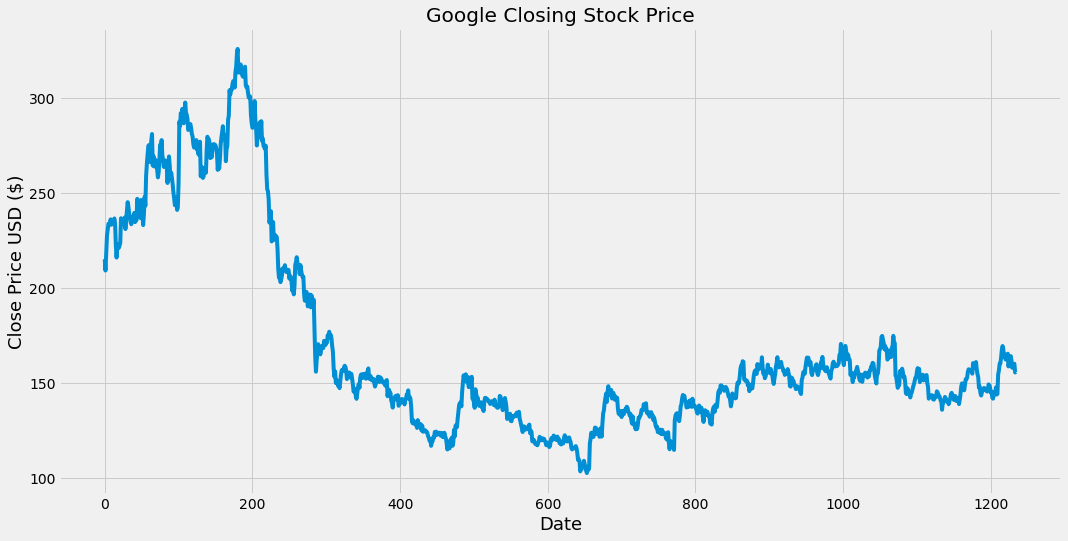

In [24]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Google Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [25]:
data = data[["Date","Close"]] 
data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head(10)

,ds,y
0,2018-10-08,215.15
1,2018-10-05,209.20
2,2018-10-04,218.20
3,2018-10-03,227.60
4,2018-10-01,230.90
5,2018-09-28,233.75
6,2018-09-27,233.25
7,2018-09-26,234.25
8,2018-09-25,236.10
9,2018-09-24,233.30


In [26]:
from fbprophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(data)

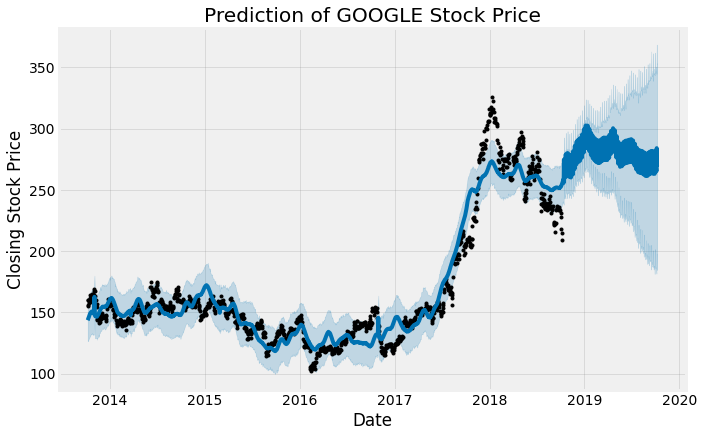

In [27]:
future = m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of GOOGLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

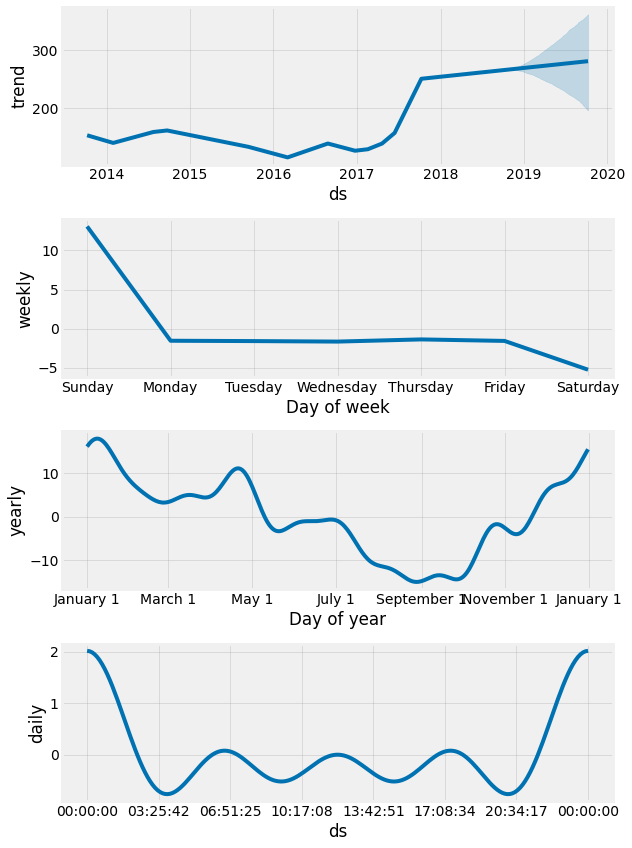

In [28]:
m.plot_components(predictions)
plt.show()